In [78]:
class add_graph:
    def __init__(self): #생성자 함수 변수를 초기화 하는 역할을 수행 (메모리 공간 확보 안한다, backward 에서 쓰지않기 때문에)
        pass
    def forward(self, x, y):
        out = x + y
        return out
    def backward(self, dout): #덧셈에 대한 미분식
        dx = 1 * dout
        dy = 1 * dout
        return dx, dy

In [79]:
class mul_graph:
    def __init__(self):
        self.x = None
        self.y = None

    def forward(self, x, y):
        self.x = x
        self.y = y
        out = x * y
        return out
    
    def backward(self, dout): #곱셈에 대한 미분식
        dx = self.y * dout
        dy = self.x * dout
        return dx, dy

In [80]:
class mse_graph:
    def __init__(self): #생성자 함수 변수를 초기화 하는 역할을 수행 (메모리 공간 확보, 메모리는 비어있는)
        self.loss = None
        self.y = None
        self.t = None
        self.x = None

    def forward(self, y, t):
        self.t = t
        self.y = y
        self.loss = np.square(self.t - self.y).sum() / self.t.shape[0] #오차(실제값-예측값)를 제곱
        return self.loss
    
    def backward(self, x, dout=1):
        data_size = self.t.shape[0]
        dweight_mse = (((self.y - self.t) * x).sum() * 2 / data_size)
        dbias_mse = (self.y - self.t).sum() * 2 / data_size
        return dweight_mse, dbias_mse



In [81]:
apple = 100
apple_num = 3
orange = 150
orange_num = 3
tax = 1.1

In [82]:
mul_apple_graph = mul_graph()
mul_orange_graph = mul_graph()
add_apple_orange_graph = add_graph()
mul_tax_graph = mul_graph()

In [83]:
apple_price = mul_apple_graph.forward (
    apple, apple_num)
orange_price = mul_orange_graph.forward(
    orange, orange_num)
all_price = add_apple_orange_graph.forward(
    apple_price, orange_price)
total_price = mul_tax_graph.forward(
    all_price, tax)
print(total_price) #결과에 0.00000000001 값은 float사용할 때 나오는 값 무시해도 된다

825.0000000000001


In [84]:
dprice = 1
dall_price, dtax = mul_tax_graph.backward(dprice)
dapple_price, dorange_price = \
    add_apple_orange_graph.backward(dall_price)
dorange, dorange_num = mul_orange_graph.backward(
    dorange_price)
dapple, dapple_num = mul_apple_graph.backward(
    dapple_price)

print('dApple', dapple)
print('dApple_num', dapple_num)
print('dOrange', dorange)
print('dOrange_num', dorange_num)

dApple 3.3000000000000003
dApple_num 110.00000000000001
dOrange 3.3000000000000003
dOrange_num 165.0


In [85]:
# 머신 러닝 뜯어보기
import numpy as np

In [86]:
def celcieus_to_fahrenheit(x): #미분 함수
    return x * 1.8 + 32

In [87]:
weight_graph = mul_graph()
bias_graph = add_graph()

In [88]:
weight = np.random.uniform(0, 5, 1) #random.uniform 0에서 5까지 값 중에 동일한 확률로 1개
print(weight)
bias = 0
data_C = np.array(range(0, 100))
data_F = celcieus_to_fahrenheit(data_C)
scaled_data_C = data_C / 100
scaled_data_F = data_F / 100
print(scaled_data_C)
print(scaled_data_F)

[0.4219632]
[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99]
[0.32  0.338 0.356 0.374 0.392 0.41  0.428 0.446 0.464 0.482 0.5   0.518
 0.536 0.554 0.572 0.59  0.608 0.626 0.644 0.662 0.68  0.698 0.716 0.734
 0.752 0.77  0.788 0.806 0.824 0.842 0.86  0.878 0.896 0.914 0.932 0.95
 0.968 0.986 1.004 1.022 1.04  1.058 1.076 1.094 1.112 1.13  1.148 1.166
 1.184 1.202 1.22  1.238 1.256 1.274 1.292 1.31  1.328 1.346 1.364 1.382
 1.4   1.418 1.436 1.454 1.472 1.49  1.508 1.526 1.544 1.562 1.58  1.598
 1.616 1.634 1.652 1.67  1.688 1.706 1.724

In [89]:
weighted_data = weight_graph.forward(
    weight, scaled_data_C)
predict_data = bias_graph.forward(
    weighted_data, bias)
print(predict_data)

[0.         0.00421963 0.00843926 0.0126589  0.01687853 0.02109816
 0.02531779 0.02953742 0.03375706 0.03797669 0.04219632 0.04641595
 0.05063558 0.05485522 0.05907485 0.06329448 0.06751411 0.07173374
 0.07595338 0.08017301 0.08439264 0.08861227 0.0928319  0.09705154
 0.10127117 0.1054908  0.10971043 0.11393007 0.1181497  0.12236933
 0.12658896 0.13080859 0.13502823 0.13924786 0.14346749 0.14768712
 0.15190675 0.15612639 0.16034602 0.16456565 0.16878528 0.17300491
 0.17722455 0.18144418 0.18566381 0.18988344 0.19410307 0.19832271
 0.20254234 0.20676197 0.2109816  0.21520123 0.21942087 0.2236405
 0.22786013 0.23207976 0.23629939 0.24051903 0.24473866 0.24895829
 0.25317792 0.25739755 0.26161719 0.26583682 0.27005645 0.27427608
 0.27849571 0.28271535 0.28693498 0.29115461 0.29537424 0.29959387
 0.30381351 0.30803314 0.31225277 0.3164724  0.32069204 0.32491167
 0.3291313  0.33335093 0.33757056 0.3417902  0.34600983 0.35022946
 0.35444909 0.35866872 0.36288836 0.36710799 0.37132762 0.37554

In [90]:
dout = 1
dbias, dbiased_data = bias_graph.backward(dout) #미분은 뒤에서 나오는 수부터 거꾸로 (backword)
dweight, dscaled_data_C = weight_graph.backward(dbiased_data)
print(dbias)
print(dweight)

1
[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99]


In [91]:
mseGraph = mse_graph() #평균 제곱 오차 
mse = mseGraph.forward(predict_data, scaled_data_F)
print(mse)

1.1624939164908712


In [92]:
weight_mse_gradient, bias_mse_gradient = mseGraph.backward(scaled_data_C)
print(weight_mse_gradient)
print(bias_mse_gradient)                                                             

-1.221756763811484
-2.0042564278565087


In [93]:
learning_rate = 0.1
learned_weight = weight - learning_rate * weight_mse_gradient * np.average(dweight)
print('before learning weight :', weight)
print('after learning weight :', learned_weight)

before learning weight : [0.4219632]
after learning weight : [0.48244016]


In [94]:
learned_bias = bias - learning_rate * bias_mse_gradient * dbias
print('before learning bias:', bias)
print('after learning bias:', learned_bias)

before learning bias: 0
after learning bias: 0.2004256427856509


In [95]:
error_list = []
weight_list = []
bias_list = []
for i in range(1000):
    #forward
    weight_data = weight_graph.forward(weight, scaled_data_C)
    predict_data = bias_graph.forward(weight_data, bias)
    #backward
    dout = 1
    dbias, dbiased_data = bias_graph.backward(dout)
    dweight, dscaled_data_C = weight_graph.backward(dbiased_data)
    #mse
    mse = mseGraph.forward(predict_data, scaled_data_F)
    error_list.append(mse)
    weight_mse_gradient, bias_mse_gradient = mseGraph.backward(scaled_data_C)
    weight_list.append(weight)
    weight = weight - learning_rate * weight_mse_gradient * np.average(dweight)
    bias_list.append(bias)
    bias = bias - learning_rate * bias_mse_gradient * dbias

weight_list.append(weight)
bias_list.append(bias)
print(weight)
print(bias)

[1.79926582]
0.32037723826173514


In [96]:
print(error_list[-1])

4.5773006071047507e-08


In [97]:
import matplotlib.pyplot as plt

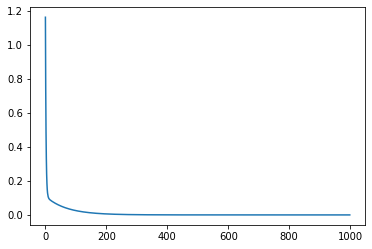

In [98]:
plt.plot(error_list)
plt.show()

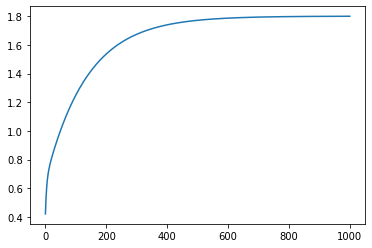

In [99]:
plt.plot(weight_list)
plt.show()

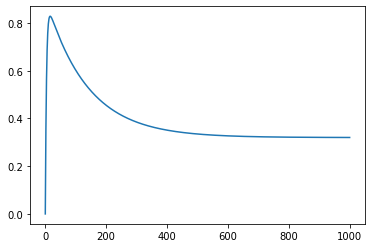

In [100]:
plt.plot(bias_list)
plt.show()